# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

In [2]:
#setting up Kaggle & TuriCreate package s
import json
import os


!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 
!pip install turicreate
!pip install networkx --upgrade
!pip install python-igraph
import networkx as nx
import turicreate as tc 

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)


mkdir: cannot create directory ‘/root/.kaggle/’: File exists
Mounted at /content/gdrive


In [3]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

In [3]:
!mkdir ./datasets/
!mkdir ./datasets/scrubs
!wget http://dynamics.cs.washington.edu/nobackup/reddit/Scrubs.tar.gz -O ./datasets/scrubs/Scrubs.tar.gz
!tar -xf ./datasets/scrubs/Scrubs.tar.gz -C ./datasets/scrubs/
!ls ./datasets/scrubs/


mkdir: cannot create directory ‘./datasets/’: File exists
mkdir: cannot create directory ‘./datasets/scrubs’: File exists
--2021-11-15 07:56:03--  http://dynamics.cs.washington.edu/nobackup/reddit/Scrubs.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21044518 (20M) [application/x-gzip]
Saving to: ‘./datasets/scrubs/Scrubs.tar.gz’

./datasets/scrubs/S 100%[===================>]  20.07M  11.0MB/s    in 1.8s    

2021-11-15 07:56:06 (11.0 MB/s) - ‘./datasets/scrubs/Scrubs.tar.gz’ saved [21044518/21044518]

metadata.json			     Scrubs.2010-12-10.2014-01-31.sgraph
Scrubs.2010-12-10.2011-01-07.sgraph  Scrubs.2010-12-10.2014-02-28.sgraph
Scrubs.2010-12-10.2011-02-04.sgraph  Scrubs.2010-12-10.2014-03-28.sgraph
Scrubs.2010-12-10.2011-03-04.sgraph  Scrubs.2010-12-10.2014-04-25.

In [4]:
%matplotlib inline

In [5]:
sg = tc.load_sgraph("./datasets/scrubs/Scrubs.2010-12-10.2011-09-16.sgraph")
sg.summary()


{'num_edges': 483, 'num_vertices': 494}

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [6]:
pr = tc.pagerank.create(sg)
sg.vertices['pagerank'] = pr['graph'].vertices['pagerank']
degree = tc.degree_counting.create(sg)
sg.vertices['total_degree'] = degree['graph'].vertices['total_degree']
sg.vertices['in_degree'] = degree['graph'].vertices['in_degree']
sg.vertices['out_degree'] = degree['graph'].vertices['out_degree']
sg.vertices.sort("total_degree", ascending=False)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 411.244               |

| 2         | 99.2034               |

| 3         | 34.716                |

| 4         | 20.0974               |

| 5         | 12.89                 |

| 6         | 8.44302               |

| 7         | 6.0273                |

| 8         | 4.22827               |

| 9         | 3.1752                |

| 10        | 2.34503               |

| 11        | 1.81352               |

| 12        | 1.39746               |

| 13        | 1.10423               |

| 14        | 0.878946              |

| 15        | 0.709171              |

| 16        | 0.576984              |

| 17        | 0.472899              |

| 18        | 0.389688              |

| 19        | 0.322697              |

| 20        | 0.268345              |

+-----------+-----------------------+

__id,mindate,maxdate,pagerank,total_degree,in_degree,out_degree
remlap,2011-01-15 17:37:43,2016-10-26 17:04:12,9.58032345784893,136,52,84
isleshocky,2011-06-16 16:37:00,2016-09-24 01:43:43,1.350674633414067,42,10,32
Lampmonster1,2011-04-14 18:38:12,2016-10-31 13:05:19,1.2788969290027907,35,9,26
chrisis123,2010-12-10 06:27:12,2016-01-11 15:08:04,2.2600366202745636,34,14,20
WoozleWuzzle,2011-01-14 22:55:39,2016-04-13 22:15:24,2.921072965019373,29,15,14
JanitorOfSacredHeart,2011-03-27 18:31:14,2013-10-24 06:54:16,1.8520050488684712,20,7,13
baxterdly,2011-03-07 03:31:11,2014-11-19 03:13:12,2.5156605649153816,19,9,10
JohncMcginley,2011-08-29 16:44:08,2011-08-29 17:03:44,1.4433469920512907,13,10,3
ISISFieldAgent,2011-05-14 22:24:46,2016-07-16 11:29:06,1.1158685505295376,11,7,4
symbiotics,2011-04-14 17:27:31,2016-10-13 04:31:17,0.5346523162753336,11,4,7


In [7]:
sg.summary()
data=sg.vertices.to_dataframe()

In [8]:
data=data[data["total_degree"]<120] #remove outlier

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

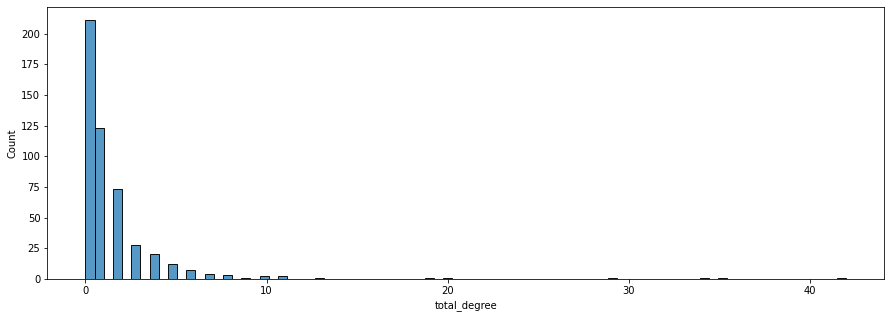

In [9]:

fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(data=data, x="total_degree",ax=ax)

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [10]:
v=pr["pagerank"].sort("pagerank", ascending=False)[:40]

In [11]:
v

__id,pagerank,delta
remlap,9.58032345784893,0.002559769744900464
pablokam,3.536322912466598,0.0315431242121571
Cletus_awreetus,3.208069515445573,0.030542493223315592
Xeon06,2.9783831613148117,7.471515577250898e-05
WoozleWuzzle,2.921072965019373,0.0015908198884400093
Relient-J,2.7364915584937894,0.0007741804477086056
baxterdly,2.5156605649153816,0.0021328056568359344
mcgovernor,2.3231730338506336,0.04819336123561957
Damonstration,2.2637634932438555,0.03824950185394993
chrisis123,2.2600366202745636,0.0007102386813846451


In [12]:
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g
ng = sgraph2nxgraph(sg)


In [13]:
subgraph=nx.subgraph(ng,v["__id"])
subgraph.number_of_nodes()

40

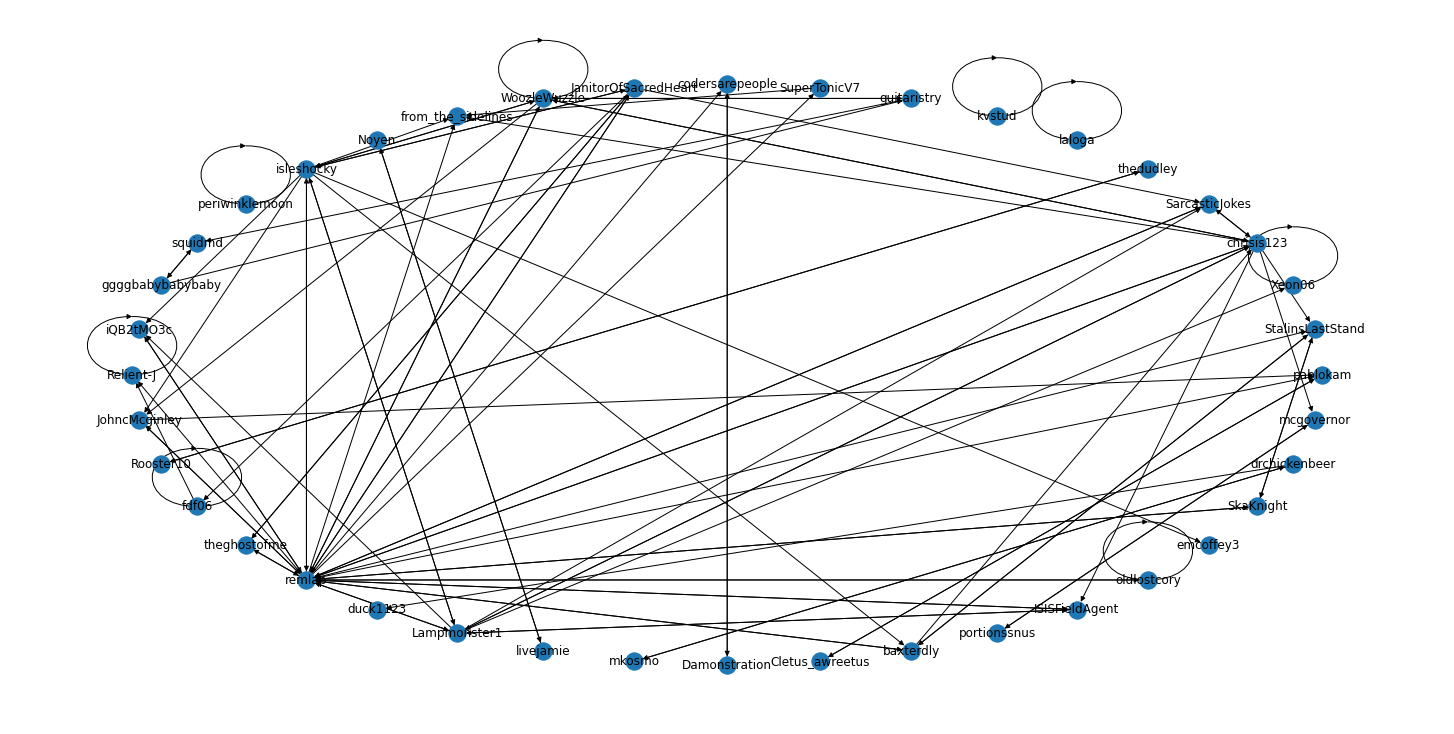

In [14]:
plt.figure(figsize=(20,10))
#h = g.subgraph(h.vs["name"])
nx.draw_circular(subgraph, with_labels=True)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

### Average shortest path
graph is not weakly connected so this metric is not defined.
NetworkX reccomends calculating short path for each component

In [35]:
nng = sgraph2nxgraph(sg, is_directed=False)
subgraph_nd=nx.subgraph(nng,v["__id"])
for c in nx.connected_components(subgraph_nd):
  print(nx.average_shortest_path_length(subgraph_nd.subgraph(c)))


2.535632183908046
1.0
0
0
1.0
0
1.3333333333333333


### page rank

In [16]:
pr=nx.pagerank(subgraph)
print(pr)


{'pablokam': 0.041109396667443975, 'StalinsLastStand': 0.01672379814913492, 'Xeon06': 0.038758253526707705, 'chrisis123': 0.02966074668406462, 'SarcasticJokes': 0.013242768182663033, 'thedudley': 0.02904353915216901, 'laloga': 0.02904353915216901, 'kvstud': 0.02904353915216901, 'guitaristry': 0.016048192282784708, 'SuperTonicV7': 0.005581115217509168, 'codersarepeople': 0.03345222001956103, 'JanitorOfSacredHeart': 0.01202618002863216, 'WoozleWuzzle': 0.02616380211288203, 'from_the_sidelines': 0.013752086347230925, 'Noyen': 0.02904353915216901, 'isleshocky': 0.03216265055287607, 'periwinklemoon': 0.02904353915216901, 'squidmd': 0.02039769654130602, 'ggggbabybabybaby': 0.021694928809761534, 'iQB2tMO3c': 0.008983030255469, 'Relient-J': 0.0693000602433783, 'JohncMcginley': 0.009996111520561016, 'Rooster10': 0.02904353915216901, 'fdf06': 0.012674996554905945, 'theghostofme': 0.007852752906022862, 'remlap': 0.10371798154681512, 'duck1123': 0.009719340826508736, 'Lampmonster1': 0.032589704255

### triangles

In [17]:

print(nx.triangles(subgraph_nd))



{'pablokam': 1, 'StalinsLastStand': 4, 'Xeon06': 0, 'chrisis123': 10, 'SarcasticJokes': 4, 'thedudley': 0, 'laloga': 0, 'kvstud': 0, 'guitaristry': 1, 'SuperTonicV7': 1, 'codersarepeople': 0, 'JanitorOfSacredHeart': 3, 'WoozleWuzzle': 4, 'from_the_sidelines': 3, 'Noyen': 0, 'isleshocky': 9, 'periwinklemoon': 0, 'squidmd': 1, 'ggggbabybabybaby': 1, 'iQB2tMO3c': 3, 'Relient-J': 0, 'JohncMcginley': 4, 'Rooster10': 0, 'fdf06': 0, 'theghostofme': 1, 'remlap': 24, 'duck1123': 0, 'Lampmonster1': 8, 'livejamie': 0, 'mkosmo': 0, 'Damonstration': 0, 'Cletus_awreetus': 0, 'baxterdly': 4, 'portionssnus': 0, 'ISISFieldAgent': 3, 'oldlostcory': 0, 'emcoffey3': 0, 'SkaKnight': 1, 'drchickenbeer': 0, 'mcgovernor': 0}


**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [33]:
nng.edges[('Smashman2004', 'remlap')]

{'__dst_id': 'Smashman2004',
 '__src_id': 'remlap',
 'maxdate': datetime.datetime(2011, 9, 7, 17, 34, 9),
 'mindate': datetime.datetime(2011, 9, 7, 17, 34, 9),
 'weight': 1}

In [38]:
#change name of id:
new_graph=ng.copy()
for n in new_graph:
    new_graph.nodes[n]['userid'] = new_graph.nodes[n]['__id']
    del new_graph.nodes[n]['maxdate']
    del new_graph.nodes[n]['mindate']
    del new_graph.nodes[n]['__id']

for edge in new_graph.edges:
    new_graph.edges[edge]['dst_id'] = new_graph.edges[edge]['__dst_id']
    new_graph.edges[edge]['src_id'] = new_graph.edges[edge]['__src_id']
    del new_graph.edges[edge]['__dst_id']
    del new_graph.edges[edge]['__src_id']
    del new_graph.edges[edge]['maxdate']
    del new_graph.edges[edge]['mindate']


nx.write_gml(new_graph, 'network.gml')
nx.write_gexf(new_graph, "network.gexf")



In [6]:
from IPython.display import Image

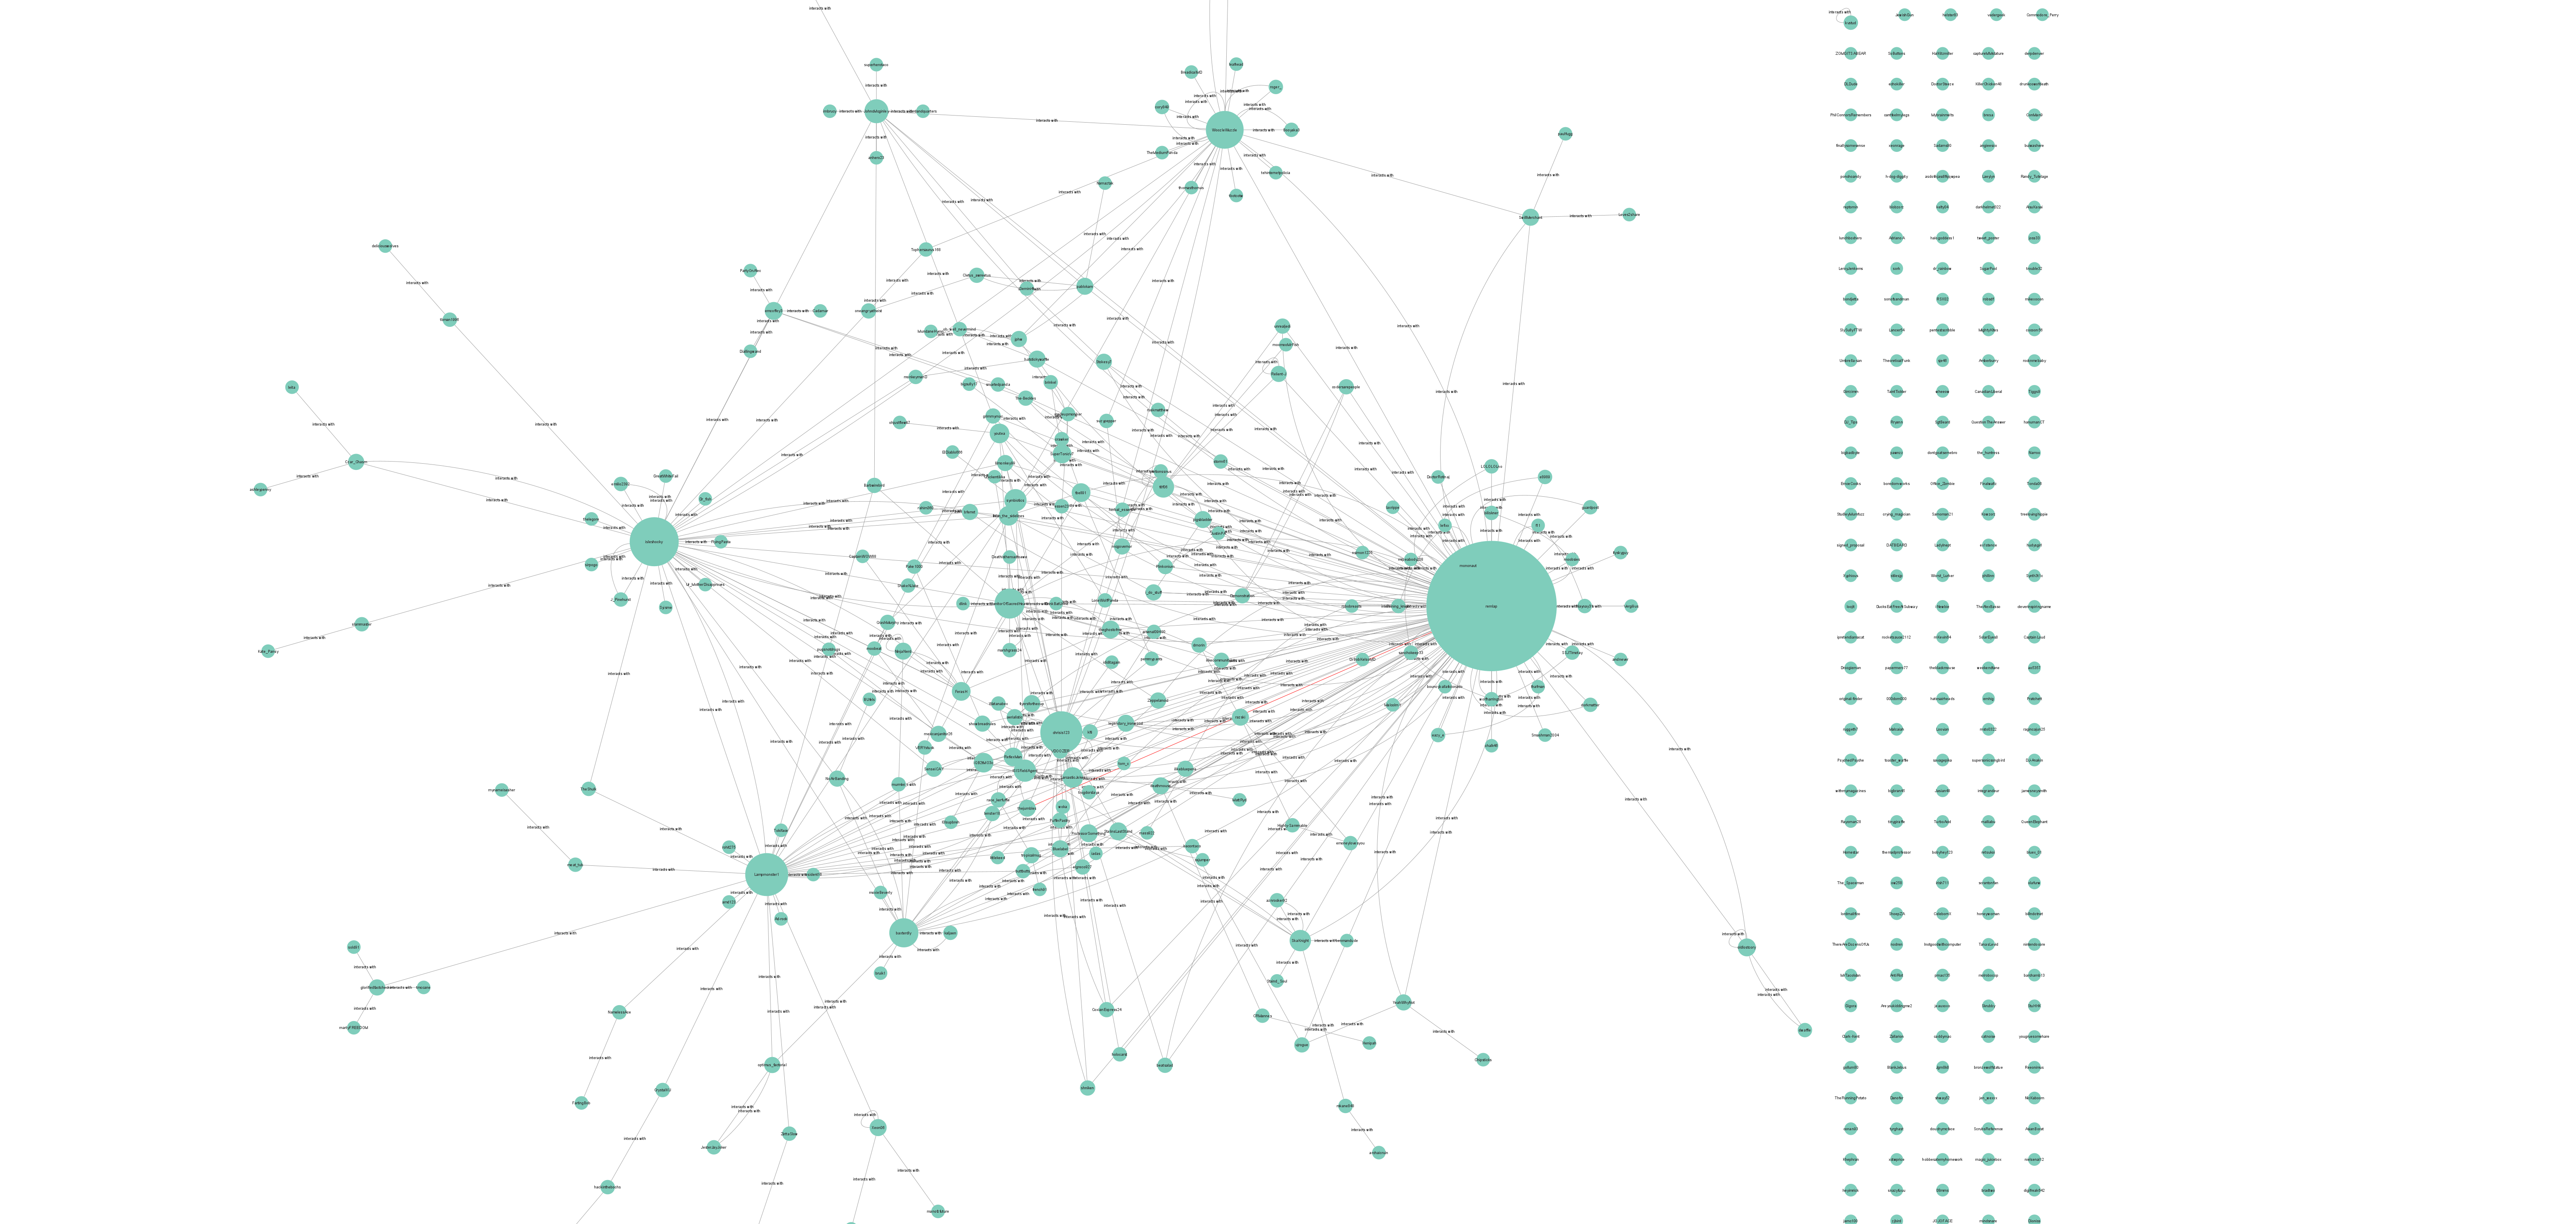

In [41]:
Image("/content/network.gml.png")

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

In [61]:
sg.get_edges()[15]

{'__dst_id': 'Zeppelanoid',
 '__src_id': 'JanitorOfSacredHeart',
 'maxdate': datetime.datetime(2011, 4, 6, 16, 4, 57),
 'mindate': datetime.datetime(2011, 4, 6, 16, 4, 57),
 'weight': 1}

number if vertices is 4, number of edges is 9


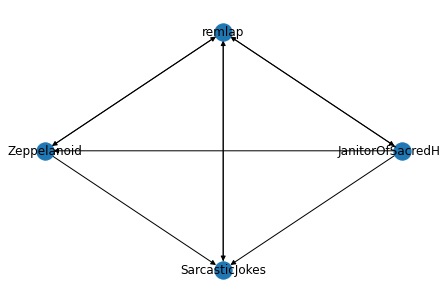

In [63]:
def get_neighborhhod(v):
  sub=sg.get_neighborhood(ids=[v])
  sub=sgraph2nxgraph(sub, is_directed=True)
  nx.draw_circular(sub, with_labels=True)
  print("number if vertices is {}, number of edges is {}".format(len(sub.nodes), len(sub.edges)))
get_neighborhhod("Zeppelanoid")

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [7]:
!mkdir ./datasets/chess
!wget http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz -O ./datasets/chess/fcis.tar.gz
./datasets/chess/fcis.tar.gz -C ./datasets/chess/
!ls ./datasets/chess/


mkdir: cannot create directory ‘./datasets/chess’: File exists
--2021-11-15 11:08:17--  http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘./datasets/chess/fcis.tar.gz’

./datasets/chess/fc 100%[===================>]   6.38G  22.4MB/s    in 5m 10s  

2021-11-15 11:13:27 (21.1 MB/s) - ‘./datasets/chess/fcis.tar.gz’ saved [6852261483/6852261483]






yes



Y
y
 

FCIS  fcis.tar.gz


In [8]:
v_sf = tc.load_sframe("./datasets/chess/FCIS/fcis_chess.vertices.sframe")
l_sf = tc.load_sframe("./datasets/chess/FCIS/fcis_chess.interactions.sframe")

In [9]:
sg = tc.SGraph(vertices=v_sf, edges=l_sf, vid_field="v_id", src_field="src_id", dst_field="dst_id")

In [11]:
pr = tc.pagerank.create(sg,_single_precision =True)
pr

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 632166                |

| 2         | 180728                |

| 3         | 68816.1               |

| 4         | 37065.1               |

| 5         | 22362.9               |

| 6         | 14085.1               |

| 7         | 9275.28               |

| 8         | 6324.12               |

| 9         | 4374.45               |

| 10        | 3129.99               |

| 11        | 2241.2                |

| 12        | 1641.8                |

| 13        | 1201.78               |

| 14        | 891.069               |

| 15        | 660.813               |

| 16        | 493.889               |

| 17        | 369.505               |

| 18        | 277.958               |

| 19        | 209.503               |

| 20        | 158.656               |

+-----------+-----------------------+

Class                                    : PagerankModel

Graph
-----
num_edges                                : 429747476
num_vertices                             : 519583

Results
-------
graph                                    : SGraph. See m['graph']
vertex pagerank                          : SFrame. See m.pagerank
change in last iteration (L1 norm)       : 158.6556

Settings
--------
probability of random jumps to any node in the graph : 0.15
convergence threshold (L1 norm)          : 0.01
maximum number of iterations             : 20

Metrics
-------
training time (secs)                     : 2707.0861
number of iterations                     : 20

Queryable Fields
----------------
delta                                    : Change in pagerank for the last iteration in L1 norm
graph                                    : A new SGraph with the pagerank as a vertex property
max_iterations                           : The maximun number of iterations to run
num_iterations              

In [12]:
c=pr["pagerank"].sort("pagerank", ascending=False)[:10]
c

__id,pagerank,delta
inemuri,1613.810765156493,0.306541067385524
mscp,1564.7589296540514,0.02525966739949581
GriffySr,962.7591784068876,0.08166744373409074
GriffyJr,913.0835274363983,0.038067612050667776
IFDThor,890.8294166755912,0.07975265255470276
callipygian,669.0030241684835,0.09918266355498417
parrot,631.5064943598877,0.008263891074193452
MiloBot,598.3467310574679,0.16506052642398572
BabyLurking,482.10238934955976,0.09668122129636458
LuigiBot,458.3049984086445,0.09320262325434214


**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [13]:
import json
import os
!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"amirbialer","key":"f2af62d43f0aaf0ee3bea5998634a1b7"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [14]:
!mkdir ./datasets/ltor

# download the dataset from Kaggle and unzip it
!kaggle datasets download paultimothymooney/lord-of-the-rings-data  -p ./datasets/ltor
!unzip ./datasets/ltor/*.zip  -d ./datasets/ltor
!ls ./datasets/ltor

  0% 0.00/88.0k [00:00<?, ?B/s]
100% 88.0k/88.0k [00:00<00:00, 26.1MB/s]
Archive:  ./datasets/ltor/lord-of-the-rings-data.zip
  inflating: ./datasets/ltor/lotr_characters.csv  
  inflating: ./datasets/ltor/lotr_scripts.csv  
lord-of-the-rings-data.zip  lotr_characters.csv  lotr_scripts.csv


In [15]:
import pandas as pd
df = pd.read_csv("./datasets/ltor/lotr_characters.csv")
df = df.fillna('')

In [16]:
import re
def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s
    
    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]
df['norm_spouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))
    
links_df = df[['name', 'norm_spouse', 'race', 'gender']]
links_df = links_df.dropna()
links_df2 = pd.merge(links_df, links_df, left_on="name", right_on="norm_spouse")
links_df2 = links_df2[["name_x","race_x", "gender_x", "name_y", "race_y", "gender_y"]]
links_df2

,name_x,race_x,gender_x,name_y,race_y,gender_y
0,Adanel,Men,Female,Belemir,Men,Male
1,Angrod,Elves,Male,Eldalótë,Elves,Female
2,Ar-Pharazôn,Men,Male,Tar-Míriel,Men,Female
3,Ar-Gimilzôr,Men,Male,Inzilbêth,Men,Female
4,Tarannon Falastur,Men,Male,Berúthiel,Men,Female
...,...,...,...,...,...,...
122,Amroth,Elves,Male,Nimrodel,Elves,Female
123,Amarië,Elves,Female,Finrod,Elves,Male
124,Ailinel,Men,Female,Orchaldor,Men,Male
125,Almarian,Men,Female,Tar-Meneldur,Men,Male


In [17]:
g = nx.Graph()

for i, r in links_df2.iterrows():
    g.add_node(r['name_x'],race=r["race_x"], gender=r["gender_x"])
    g.add_node(r['name_y'],race=r["race_y"], gender=r["gender_y"])
    edges_list = [(r['name_x'], r['name_y']) for i, r in links_df2.iterrows()]

g.add_edges_from(edges_list)

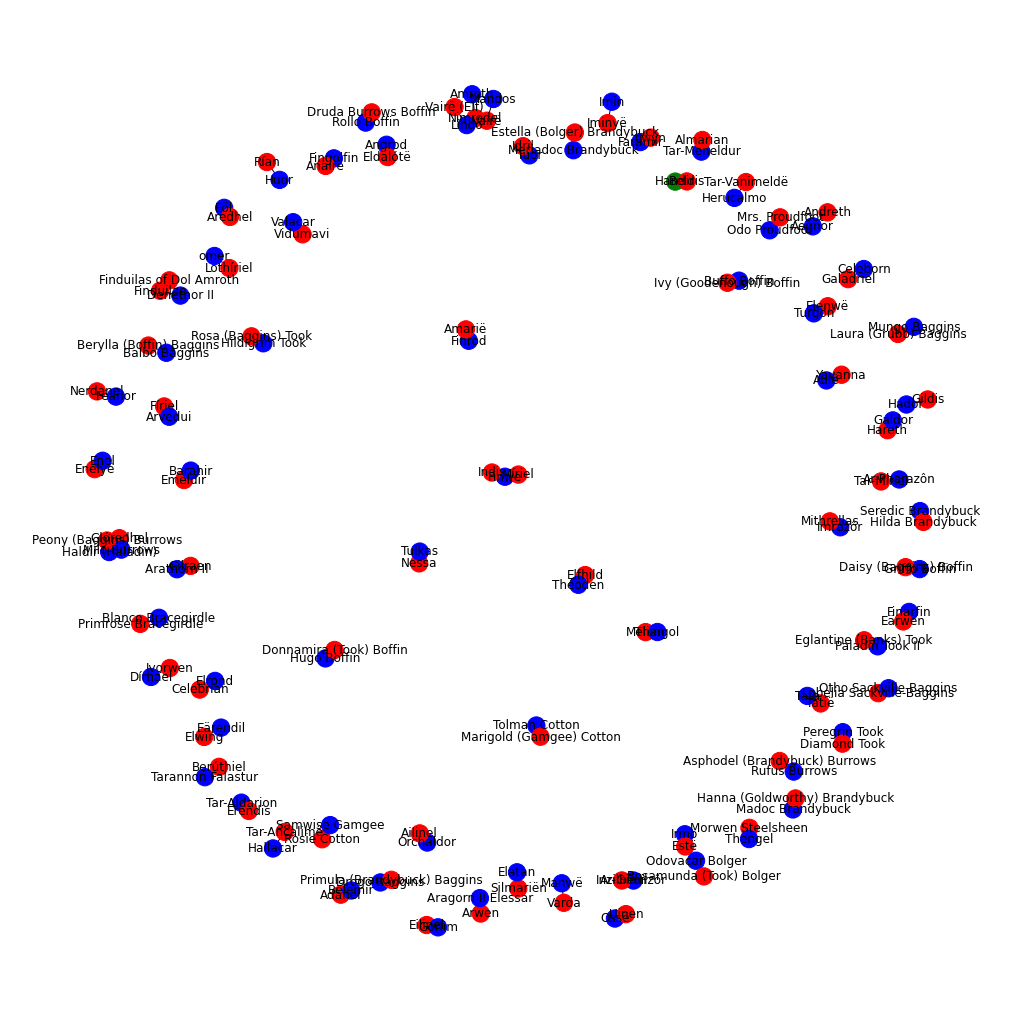

In [20]:
import matplotlib.pyplot as plt

node_colors = []
# add node color by gender
for node in g.nodes(data=True):

    if node[1]['gender'] == "Male":
        node_colors.append('blue')
    elif node[1]['gender'] == "Female":
        node_colors.append('red')
    else:
        node_colors.append('green')


plt.figure(3,figsize=(14,14))
nx.draw_spring(g, with_labels=True, node_color=node_colors)

In [21]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [26]:
!cp gdrive/MyDrive/Colab_Notebooks/HW-4_Amir_Bialer.ipynb ./

In [27]:
!jupyter nbconvert --to PDF "HW-4_Amir_Bialer.ipynb"


[NbConvertApp] Converting notebook HW-4_Amir_Bialer.ipynb to PDF
[NbConvertApp] Support files will be in HW-4_Amir_Bialer_files/
[NbConvertApp] Making directory ./HW-4_Amir_Bialer_files
[NbConvertApp] Making directory ./HW-4_Amir_Bialer_files
[NbConvertApp] Making directory ./HW-4_Amir_Bialer_files
[NbConvertApp] Making directory ./HW-4_Amir_Bialer_files
[NbConvertApp] Writing 113642 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 531460 bytes to HW-4_Amir_Bialer.pdf
